### Import  modules
- numpy
- linear regression model from sklearn
- matplotlib
- scipy.optimize.curve_fit


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Generate data

In [2]:
X = np.linspace(1,50, 30)
y = 2*X-3.5
noise = 7*np.random.random(30)
y = y + noise
data = np.array([X,y]).T
np.savetxt("../data/regression/simple_regression.csv", data, delimiter=",")

#### Data import
- use numpy to read the csv file
- reshape it so it can be used by sklearn (univariate regression is not default)

In [3]:
data = np.genfromtxt('../data/regression/simple_regression.csv', delimiter=',')


Fit a Linear regression model to the data

In [4]:
X = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
reg = LinearRegression().fit(X, y)
print('R²= '+str(round(reg.score(X, y), 4)))
print('Coefficients: m = {}, b={}'.format(*reg.coef_, *reg.intercept_))

R²= 0.9958
Coefficients: m = [1.99389987], b=0.44910895695167596


make the prediction with the calculated model

In [5]:
xx = np.linspace(-1, 55, 200).reshape(-1,1)
yy = reg.predict(xx)

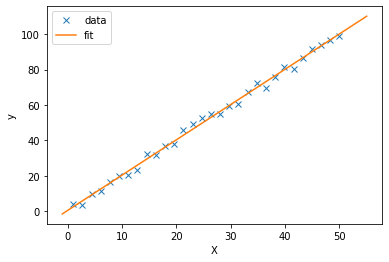

In [6]:
plt.plot(X,y, 'x', label='data')
plt.plot(xx,yy, label='fit' )
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')

### A different approach
- define a function that models the data
- use scipy curve_fit to fit the model to data

In [7]:
def linear(x, m, b):
    return m*x + b

In [8]:
X = data[:,0]
y = data[:,1]
params, cov = curve_fit(linear, X, y)
print('Coefficients: m = {:.4f}, b = {:.4f}'.format(*params))
print('Covariance Matrix :')
print(cov)
print('Coefficients with uncertainties:')
print('m = {:.2f} +- {:.2f}, b = {:.1f} +- {:.1f}'.format(params[0], np.sqrt(cov[0][0]), params[1], np.sqrt(cov[1][1])))

Coefficients: m = 1.9939, b = 0.4491
Covariance Matrix :
[[ 0.00059771 -0.0152415 ]
 [-0.0152415   0.51649668]]
Coefficients with uncertainties:
m = 1.99 +- 0.02, b = 0.4 +- 0.7


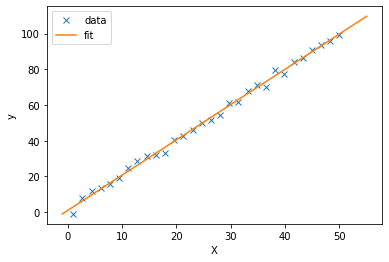

In [10]:
plt.plot(X, y, 'x', label='data')
plt.plot(xx, linear(xx,*params), label='fit' )
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')